<a href="https://colab.research.google.com/github/ahmedmusawir/modern-react-agents-youtube/blob/main/VIDEO_2_STEP_3_Modular_Financial_Agent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SETUP

### INSTALLATIONS

In [ ]:
!pip install -q langchain
!pip install -q langchain_community
!pip install -q langgraph

!pip install -q langchain_openai
!pip install -q langchain-anthropic
!pip install -q langchain-groq
!pip install -q langchain-google-genai

!pip show langchain

#!pip install openai
# !pip install -U langchain_openai
#!pip install langchain --upgrade
#!pip install --upgrade pip
# !pip install wikipedia
#!pip install langchain_community
#!pip install chromadb
#!pip uninstall pydantic -y
#!pip install pydantic==1.8.2
#!pip show pydantic
#!pip install pydantic
#!kill -9 -1
#!pip install tiktoken
#!pip install pypdf

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 16.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 412.4/412.4 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.8/50.8 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 145.8/145.8 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.7/44.7 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 16.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.8/222.8 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.6/109.6 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 1.2 MB/s eta 0:00:00
Name: langchain
Version: 0.3.16
Summary: Building applications with LLMs through composability
Home-page: https://github.com/langchain-ai

### LOADING API KEY

In [ ]:
import os
os.environ["OPENAI_API_KEY"] ="sk-proj-ulX3zMWA8***********8CUAYWg7y8Ge8pROt"
os.environ["ANTHROPIC_API_KEY"]="sk-ant-api03-Sf****************HmFelcjpHlXZEl8-IqYrs4bmmTp3hDmAaVang-IsYoZAAA"
os.environ["GOOGLE_API_KEY"] ="AIzaSyC***************oMTJMtvzSDmziA"
os.environ["GROQ_API_KEY"] ="gsk_DIdLqIGij0******************bW5XXVUtlxWcRRXwc3EDrc"


os.environ["LANGCHAIN_TRACING_V2"] = "true"
os.environ["LANGCHAIN_PROJECT"] = f"TEST"
os.environ["LANGCHAIN_ENDPOINT"] = "https://api.smith.langchain.com"
os.environ["LANGCHAIN_API_KEY"] = "lsv2_pt_4ce9448208*******************5c_37d096d1b5"

## TESTING THE MODEL RESPONSE

### OPENAI

In [ ]:
from langchain_openai import ChatOpenAI
import pprint

# Create an instance of the OpenAI class
# llm = ChatOpenAI(model="gpt-4o")
llm = ChatOpenAI(model="o1-mini")
# llm = ChatOpenAI(model="o1-preview")

# Generate text
prompt = "Who is Sam Altman (in one sentence)"
response = llm.invoke(prompt)
# print(response)
pprint.pprint(response.content)

('Sam Altman is an American entrepreneur and investor, best known as the CEO '
 'of OpenAI and the former president of the startup accelerator Y Combinator.')


### ANTHROPIC

In [ ]:
from langchain_anthropic import ChatAnthropic
from langchain.prompts import ChatPromptTemplate

claude_model = ChatAnthropic(
    model="claude-3-5-sonnet-20240620",
    api_key=os.getenv("ANTHROPIC_API_KEY"),  # Pass the API key here
    temperature=0,
    max_tokens=1024,
    timeout=None,
    max_retries=2,
    # other params...
)

prompt = "Who is Sam Altman (in one sentence)"
response = claude_model.invoke(prompt)

# print(response.content)
pprint.pprint(response.content)


('Sam Altman is an American entrepreneur and investor, best known as the CEO '
 'of OpenAI and former president of Y Combinator, who has played a significant '
 'role in shaping the tech industry and advancing artificial intelligence '
 'research.')


### GROQ - LLAMA 3.1

In [ ]:
from langchain_groq import ChatGroq

groq_model = ChatGroq(
    model="llama-3.3-70b-versatile",
    # model="llama-3.1-70b-versatile",
    temperature=0,
    max_tokens=1024,
    timeout=None,
    max_retries=2,
    # other params...
)

from langchain.schema import HumanMessage, SystemMessage, AIMessage

messages = [
    SystemMessage(content="You are a helpful AI assistant. When you introduce yourself, let the user know what LLM you are based on."),
    HumanMessage(content="Who is Sam Altman (in one sentence)?")
]

response = groq_model.invoke(messages)

# print(response.content)
pprint.pprint(response.content)

("I'm an AI assistant based on LLaMA, and Sam Altman is the CEO of OpenAI, a "
 'leading artificial intelligence research organization and developer of AI '
 'models like myself, as well as other notable technologies such as ChatGPT.')


### GOOGLE GEMINI PRO

In [ ]:
from langchain_google_genai import ChatGoogleGenerativeAI

google_model = ChatGoogleGenerativeAI(
    model="gemini-2.0-flash-exp",
    # model="gemini-1.5-pro",
    api_key=os.getenv("GOOGLE_API_KEY"),  # Pass the API key here
    temperature=0,
    max_tokens=1024,
    timeout=None,
    max_retries=2,
    # other params...
)

from langchain.schema import HumanMessage, SystemMessage, AIMessage

messages = [
    SystemMessage(content="You are a helpful AI assistant. When you introduce yourself, let the user know what specific LLM you are based on."),
    HumanMessage(content="Who is Sam Harris (in one sentence)?")
]

response = google_model.invoke(messages)

print(response.content)
# pprint.pprint(response.content)

I am a large language model, trained by Google.

Sam Harris is an American author, philosopher, neuroscientist, and podcast host known for his views on atheism, secularism, free will, and ethics.


# ReAct Agent in My Graph

## Modular Weather Agent

In [ ]:
from langchain_openai import ChatOpenAI
from langchain_core.tools import tool
from langgraph.prebuilt import create_react_agent

# Define a function to modularize the weather agent
def weather_agent(city: str):
    """
    Creates a modular weather agent with its own toolset.
    Returns the weather_agent for integration into the graph.
    """
    # Define the LLM
    llm = ChatOpenAI(model_name='gpt-4o', temperature=0.5)

    # Define the weather tool
    @tool
    def get_weather(city: str):
        """Call to get the current weather. Use this anytime asked about the weather."""
        if city.lower() == "paris":
            return "It's always sunny in Paris."
        else:
            return "It's cold and wet."

    # Create the weather agent
    weather_agent = create_react_agent(llm, tools=[get_weather])
    return weather_agent


## Modular Financial Agent

In [ ]:
from langchain_groq import ChatGroq
from langchain_core.tools import tool
from langgraph.prebuilt import create_react_agent
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain_anthropic import ChatAnthropic


# Define a function to modularize the financial agent
def financial_agent(company: str):
    """
    Creates a modular financial agent with its own toolset.
    Returns the financial_agent for integration into the graph.
    """
    # Define the LLM
    # llm = ChatOpenAI(model_name='gpt-4o', temperature=0.5)

    # llm = ChatAnthropic(
    #     # model="claude-3-5-sonnet-20241022",
    #     model="claude-3-opus-latest",
    #     temperature=0.5,
    # )

    # llm = ChatGoogleGenerativeAI(
    #     # model="gemini-2.0-flash-exp",
    #     model="gemini-1.5-pro",
    #     temperature=0.5,
    #     max_tokens=1024,
    #     timeout=None,
    #     max_retries=2,
    # )

    llm = ChatGroq(
        # model="llama-3.1-70b-versatile",
        # model="llama-3.3-70b-versatile",
        model="deepseek-r1-distill-llama-70b",
        temperature=0.5,
    )

    # Define the financial tool
    @tool
    def get_financial_status(company: str):
        """Call to get the financial status of a company. Use this anytime asked about the finances of a company"""
        if company.lower() == "google":
            return "Not so good! Google just lost the lawsuit."
        else:
            return f"{company} is financially sound, getting better!"

    # The Custom System Prompt for the Agent
    custom_system_prompt = "You are a financial report assistant. You only report by using the fincial tool you're given"

    # Create the financial agent
    financial_agent = create_react_agent(llm, tools=[get_financial_status], state_modifier=custom_system_prompt)
    return financial_agent

# Usage example for graph integration:
# financial_agent = financial_agent()
# graph_builder.add_node("financial_agent", financial_agent)


## Main Graph

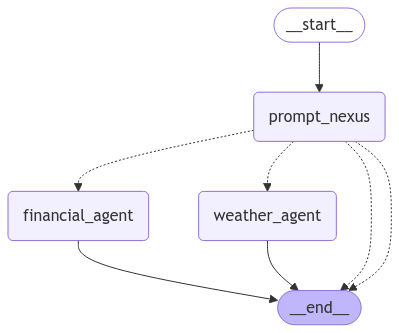

In [ ]:
from typing import TypedDict, Annotated
from langchain_openai import ChatOpenAI
from langchain_core.tools import tool
from langgraph.graph import StateGraph, END
from langgraph.prebuilt import create_react_agent
from langgraph.graph.message import add_messages

# Define the state
class State(TypedDict):
    messages: Annotated[list, add_messages]

# Initialize the graph builder
graph_builder = StateGraph(State)

# Define the LLM
llm = ChatOpenAI(model_name='gpt-4o', temperature=0.5)

# Define the prompt_nexus node
def prompt_nexus(state: State):
    return {"messages": [llm.invoke(state["messages"])]}

# Add the prompt_nexus node to the graph
graph_builder.add_node("prompt_nexus", prompt_nexus)

# ============================== WEATHER AGENT ====================================
# Add Weather Agent Node
graph_builder.add_node("weather_agent", weather_agent)

# Define the Weather Agent Routing function
def route_to_weather(state: State):
    if any("weather" in message.content.lower() for message in state["messages"]):
        return "weather_agent"
    return END

# Add conditional edges
graph_builder.add_conditional_edges("prompt_nexus", route_to_weather, {"weather_agent": "weather_agent", END: END})

# Add normal edge to Weather Agent
graph_builder.add_edge("weather_agent", END)

# ============================== FINANCIAL AGENT ====================================
# Add Financial Agent Node
graph_builder.add_node("financial_agent", financial_agent)

# Define the Financial Agent Routing function
def route_to_finance(state: State):
    if any("financial" in message.content.lower() or "finance" in message.content.lower() for message in state["messages"]):
        return "financial_agent"
    return END

# Add conditional edges
graph_builder.add_conditional_edges("prompt_nexus", route_to_finance, {"financial_agent": "financial_agent", END: END})

# Add normal edge to Financial Agent
graph_builder.add_edge("financial_agent", END)


# ============================== SET ENTRY POINT ===========================================
graph_builder.set_entry_point("prompt_nexus")

# ============================== COMPILE THE GRAPH ======================================
graph = graph_builder.compile()
graph


In [ ]:
response = graph.invoke({'messages': ('user', 'give me the financial status of OpenAI')})
# response = graph.invoke({'messages': ('user', 'how is the weather in Paris')})

print('Assistant: ', response['messages'][-1].content)

TypeError: create_react_agent() missing 1 required positional argument: 'tools'

## STEP 7: Add Conversional Memory & Compile Graph

In [ ]:
!pip install -q langgraph-checkpoint-sqlite

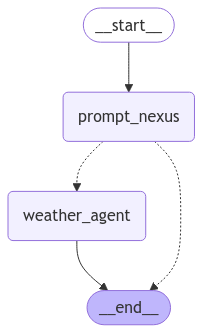

In [ ]:
from langgraph.checkpoint.sqlite import SqliteSaver
from langgraph.checkpoint.memory import MemorySaver

# memory = SqliteSaver.from_conn_string(':memory:')
# memory = SqliteSaver.from_conn_string('sqlite:///graph.db')
memory = MemorySaver()

graph = graph_builder.compile(checkpointer=memory) # ADDING MEMORY

graph

## STEP 8: Chat With Your Graph

In [ ]:
from langchain_core.messages import HumanMessage

while True:

    user_input = input('User: ')
    if user_input.lower() in ['quit', 'exit', 'bye',  'q']:
        print('Goodbye!')
        break

    config = {'configurable': {'thread_id': '1'}}

    # response = graph.invoke({'messages': ('user', user_input)})
    response = graph.invoke({'messages': ('user', user_input)}, config=config)

    print('Assistant: ', response['messages'][-1].content)
    print('-' * 50)

User: hi I'm moose from atlanta
Assistant:  Hi Moose from Atlanta! How can I assist you today?
--------------------------------------------------
User: how's the weather in my city
Assistant:  The weather in Atlanta is currently cold and wet. Make sure to bundle up and stay dry if you're heading out!
--------------------------------------------------
User: thanx my friend ... you are awesome
Assistant:  You're welcome, Moose! I'm glad I could help. If you have any more questions or need assistance, feel free to reach out. Have a great day!
--------------------------------------------------
User: bye
Goodbye!
